In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [68]:
df=pd.read_csv('SBI_life_insurance.csv')

In [69]:
df

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


In [70]:
df.shape

(1338, 8)

In [71]:
df.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age               1338 non-null int64
sex               1338 non-null int64
bmi               1338 non-null float64
children          1338 non-null int64
smoker            1338 non-null int64
region            1338 non-null int64
charges           1338 non-null float64
insuranceclaim    1338 non-null int64
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [73]:
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

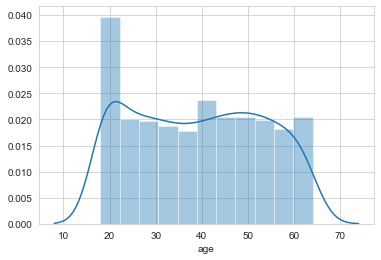

In [74]:
sns.distplot(df['age'])

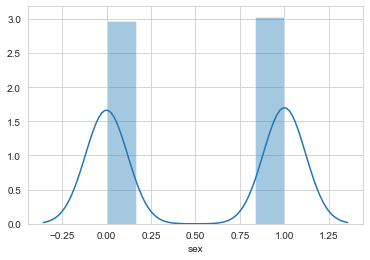

In [75]:
sns.distplot(df['sex'])

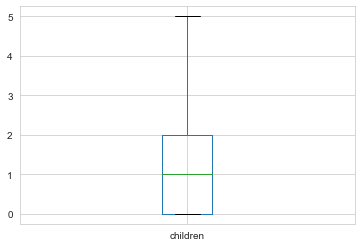

In [76]:
df['children'].plot.box()

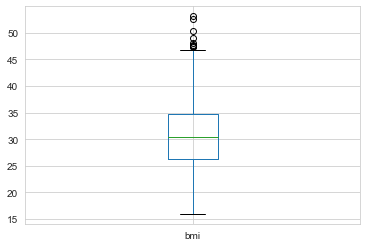

In [77]:
df['bmi'].plot.box()

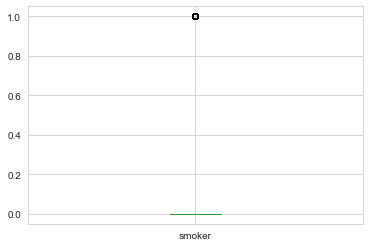

In [78]:
df['smoker'].plot.box()

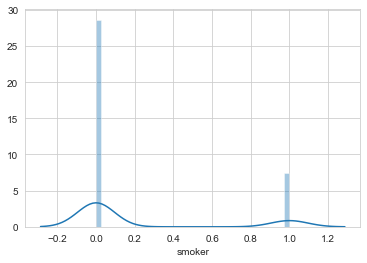

In [79]:
sns.distplot(df['smoker'])

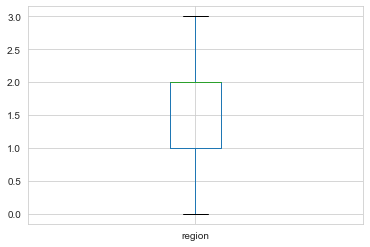

In [80]:
df['region'].plot.box()

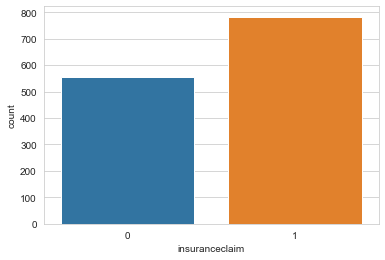

In [81]:
sns.set_style('whitegrid')
sns.countplot(x='insuranceclaim',data=df)

In [82]:
collist=df.columns.values
ncol=8
nrows=10

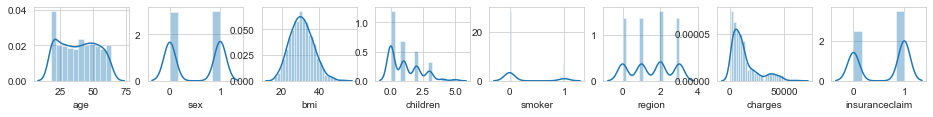

In [83]:
plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

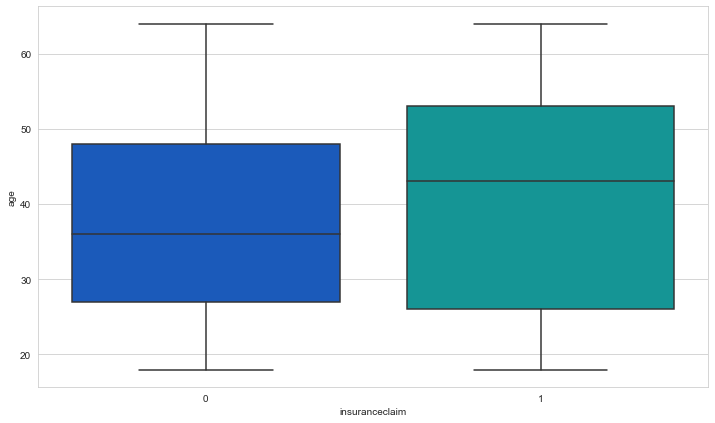

In [84]:
plt.figure(figsize=(12,7))
sns.boxplot(x='insuranceclaim',y='age',data=df,palette='winter')

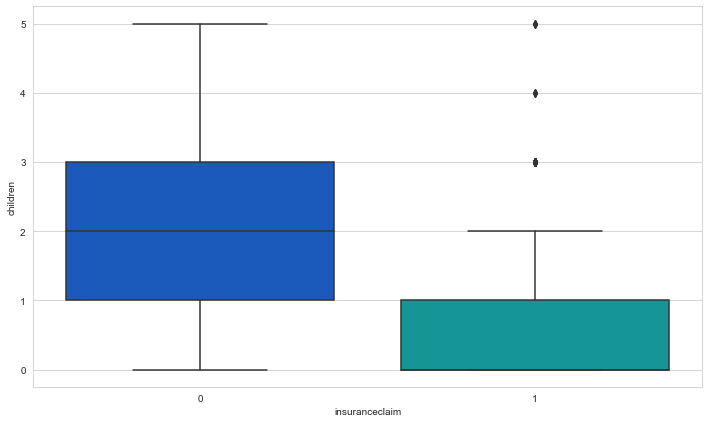

In [85]:
plt.figure(figsize=(12,7))
sns.boxplot(x='insuranceclaim',y='children',data=df,palette='winter')

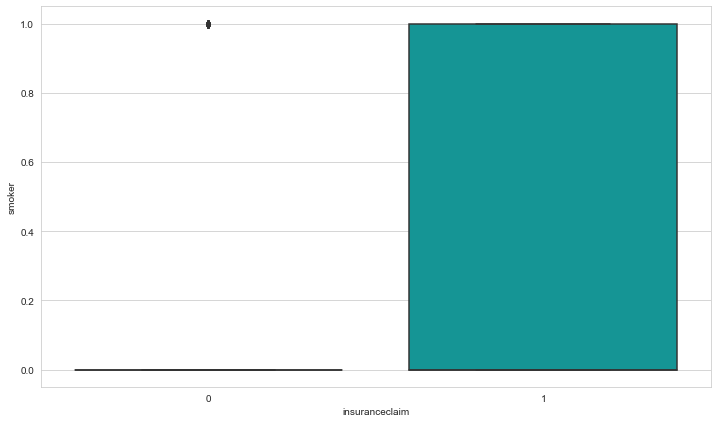

In [86]:
plt.figure(figsize=(12,7))
sns.boxplot(x='insuranceclaim',y='smoker',data=df,palette='winter')

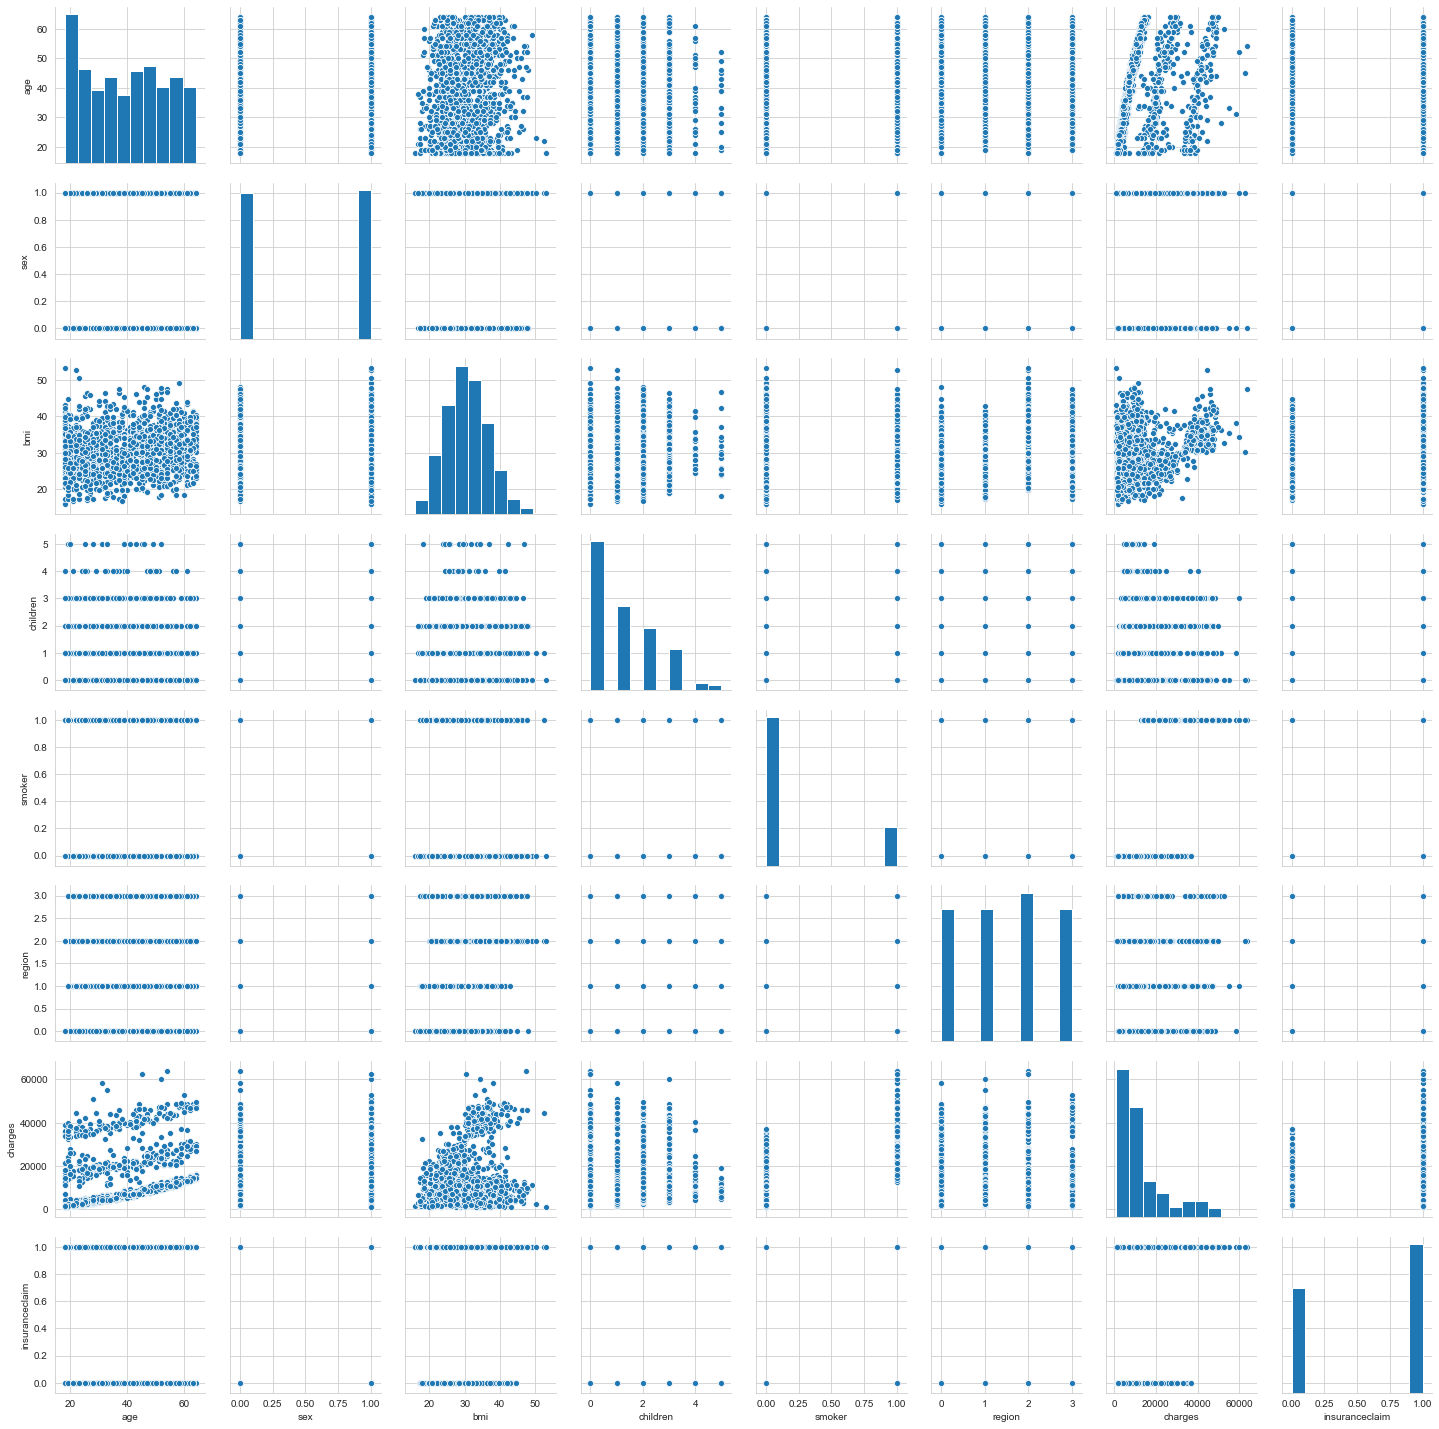

In [87]:
sns.pairplot(df)

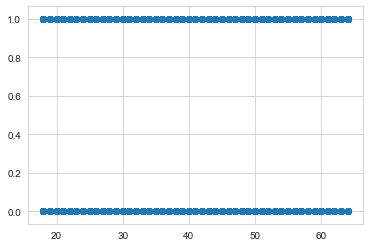

In [88]:
x=df['age']
y=df['insuranceclaim']
plt.scatter(x,y)
plt.show()

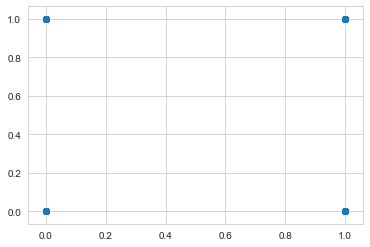

In [89]:
x=df['smoker']
y=df['insuranceclaim']
plt.scatter(x,y)
plt.show()

In [90]:
#removing outliers:

In [91]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.43876426, 1.0105187 , 0.45332   , ..., 1.34390459, 0.2985838 ,
        0.84190989],
       [1.50996545, 0.98959079, 0.5096211 , ..., 0.43849455, 0.95368917,
        0.84190989],
       [0.79795355, 0.98959079, 0.38330685, ..., 0.43849455, 0.72867467,
        1.18777557],
       ...,
       [1.50996545, 1.0105187 , 1.0148781 , ..., 0.43849455, 0.96159623,
        0.84190989],
       [1.29636188, 1.0105187 , 0.79781341, ..., 1.34390459, 0.93036151,
        1.18777557],
       [1.55168573, 1.0105187 , 0.26138796, ..., 0.46691549, 1.31105347,
        0.84190989]])

In [92]:
threshold=3
print(np.where(z>3))

(array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
        640,  819,  847,  877,  932,  937,  969,  984, 1047, 1085, 1116,
       1130, 1146, 1230, 1245, 1272, 1300, 1317], dtype=int64), array([3, 6, 3, 2, 3, 3, 3, 3, 6, 3, 6, 3, 6, 2, 3, 3, 3, 3, 3, 2, 3, 3,
       3, 6, 6, 3, 3, 6, 2], dtype=int64))


In [93]:
z[32][3]

3.240618711442044

In [94]:
z[34][6]

3.132806075214621

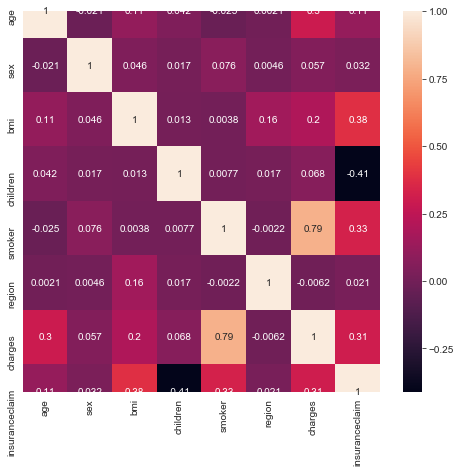

In [95]:
corr_hmap=df.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [96]:
#here children is -vely correlated to insuranceclaim
#so we can drop this

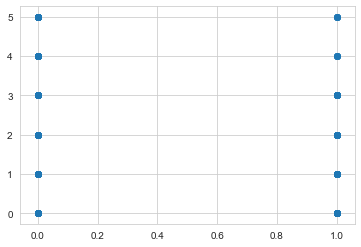

In [97]:
plt.scatter(df['insuranceclaim'],df['children'])
plt.show()

In [98]:
df.drop('children',axis=1,inplace=True)
df.head()

,age,sex,bmi,smoker,region,charges,insuranceclaim
0,19,0,27.900,1,3,16884.92400,1
1,18,1,33.770,0,2,1725.55230,1
2,28,1,33.000,0,2,4449.46200,0
3,33,1,22.705,0,1,21984.47061,0
4,32,1,28.880,0,1,3866.85520,1


In [100]:
df.shape

(1338, 7)

In [101]:
df_new=df[(z<3).all(axis=1)]
df_new

,age,sex,bmi,smoker,region,charges,insuranceclaim
0,19,0,27.900,1,3,16884.92400,1
1,18,1,33.770,0,2,1725.55230,1
2,28,1,33.000,0,2,4449.46200,0
3,33,1,22.705,0,1,21984.47061,0
4,32,1,28.880,0,1,3866.85520,1
...,...,...,...,...,...,...,...
1333,50,1,30.970,0,1,10600.54830,0
1334,18,0,31.920,0,0,2205.98080,1
1335,18,0,36.850,0,2,1629.83350,1
1336,21,0,25.800,0,3,2007.94500,0


In [102]:
df_new.shape

(1309, 7)

In [103]:
df.shape

(1338, 7)

In [56]:
#earliear we have 1338 rows but now we are left with 1309 rows

In [104]:
df=df_new

In [105]:
df.shape

(1309, 7)

In [106]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [107]:
x.shape

(1309, 6)

In [108]:
y.shape

(1309,)

In [109]:
x.head()

,age,sex,bmi,smoker,region,charges
0,19,0,27.900,1,3,16884.92400
1,18,1,33.770,0,2,1725.55230
2,28,1,33.000,0,2,4449.46200
3,33,1,22.705,0,1,21984.47061
4,32,1,28.880,0,1,3866.85520


In [110]:
y.head()

0    1
1    1
2    0
3    0
4    1
Name: insuranceclaim, dtype: int64

In [111]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

In [152]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=43)

In [153]:
x_train.shape

(1021, 6)

In [154]:
x_test.shape

(288, 6)

In [155]:
y_test.shape

(288,)

In [156]:
y_train.shape

(1021,)

In [157]:
lg=LogisticRegression()

In [158]:
lg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [159]:
pred=lg.predict(x_test)
print("accuracy_score :",accuracy_score(pred,y_test))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score : 0.7395833333333334
[[ 77  45]
 [ 30 136]]
              precision    recall  f1-score   support

           0       0.72      0.63      0.67       122
           1       0.75      0.82      0.78       166

    accuracy                           0.74       288
   macro avg       0.74      0.73      0.73       288
weighted avg       0.74      0.74      0.74       288



In [160]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.6666666666666666
[[106  16]
 [ 80  86]]
              precision    recall  f1-score   support

           0       0.57      0.87      0.69       122
           1       0.84      0.52      0.64       166

    accuracy                           0.67       288
   macro avg       0.71      0.69      0.67       288
weighted avg       0.73      0.67      0.66       288



In [161]:
svc=SVC(kernel='linear')
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7430555555555556
[[ 77  45]
 [ 29 137]]
              precision    recall  f1-score   support

           0       0.73      0.63      0.68       122
           1       0.75      0.83      0.79       166

    accuracy                           0.74       288
   macro avg       0.74      0.73      0.73       288
weighted avg       0.74      0.74      0.74       288



In [162]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7951388888888888
[[ 92  30]
 [ 29 137]]
              precision    recall  f1-score   support

           0       0.76      0.75      0.76       122
           1       0.82      0.83      0.82       166

    accuracy                           0.80       288
   macro avg       0.79      0.79      0.79       288
weighted avg       0.79      0.80      0.80       288



In [163]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.7395833333333334
[[ 77  45]
 [ 30 136]]
              precision    recall  f1-score   support

           0       0.72      0.63      0.67       122
           1       0.75      0.82      0.78       166

    accuracy                           0.74       288
   macro avg       0.74      0.73      0.73       288
weighted avg       0.74      0.74      0.74       288



In [164]:
from sklearn.ensemble import RandomForestClassifier

In [165]:
rf=RandomForestClassifier(n_estimators=100,random_state=45)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8333333333333334
[[ 89  33]
 [ 15 151]]
              precision    recall  f1-score   support

           0       0.86      0.73      0.79       122
           1       0.82      0.91      0.86       166

    accuracy                           0.83       288
   macro avg       0.84      0.82      0.83       288
weighted avg       0.84      0.83      0.83       288



In [166]:
from sklearn.ensemble import AdaBoostClassifier

In [167]:
model=AdaBoostClassifier()
model.fit(x_train,y_train)
print(model.score(x_train,y_train))

0.8256611165523996
